# What is EulerCTRNNCell?
EulerCTRNNCell is an implementation of a continuous-time recurrent neural network, discritized with the Euler method, in the Flax + Jax ecosystem. The class is an instance of the RNNCellBase class in the flax.linen API. Writing the class in this ecosystem allows for XLA to greatly increase the speed of training.

## Imports

In [8]:
import jax
import jax.numpy as jnp
from flax import linen as nn
from jax import random
from src.model import EulerCTRNNCell

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Initializing EulerCTRNNCell

In [2]:
features = 100
alpha = jnp.float32(0.1)
noise = jnp.float32(0.1)
key = random.PRNGKey(0)
x = jnp.ones((10, 50, 100)) # (batch, time, features)
x.shape

(10, 50, 100)

In [3]:
ctrnn = nn.RNN(EulerCTRNNCell(features=features, alpha=alpha, noise=noise,))
key, subkey = random.split(key)
variables = ctrnn.init(subkey, x,)
variables

{'params': {'cell': {'input_kernel': {'kernel': Array([[ 9.36762337e-03, -1.59410998e-01,  1.60366163e-01, ...,
            -1.34422988e-01,  8.53195637e-02,  9.15593188e-03],
           [-5.61605208e-02, -1.54197171e-01, -1.98093406e-03, ...,
            -1.47597952e-04,  1.33126065e-01,  9.31014568e-02],
           [ 2.23786402e-02,  4.56214659e-02, -1.61037281e-01, ...,
             6.53286055e-02, -2.03592423e-02, -1.12977475e-02],
           ...,
           [-8.85047764e-02, -6.83076959e-03,  1.96799412e-01, ...,
            -2.93256082e-02,  1.78858832e-01,  4.54324149e-02],
           [-9.83340852e-03, -8.60172808e-02, -1.59401875e-02, ...,
            -1.16266631e-01,  1.62176087e-01, -1.16567239e-01],
           [ 6.87004253e-02, -5.77253066e-02,  3.10762785e-02, ...,
             7.69414306e-02,  6.21875077e-02,  1.53740868e-02]],      dtype=float32)},
   'output_kernel': {'bias': Array([0.], dtype=float32),
    'kernel': Array([[-0.11979821],
           [ 0.21915351],
      

## Visualizing Outputs

In [4]:
key, subkey = random.split(key)
z, rates = ctrnn.apply(variables, x, init_key=subkey,)
print(f"Output shape: {z.shape}")
print(f"Rates shape: {rates.shape}")

Output shape: (10, 50, 1)
Rates shape: (10, 50, 100)


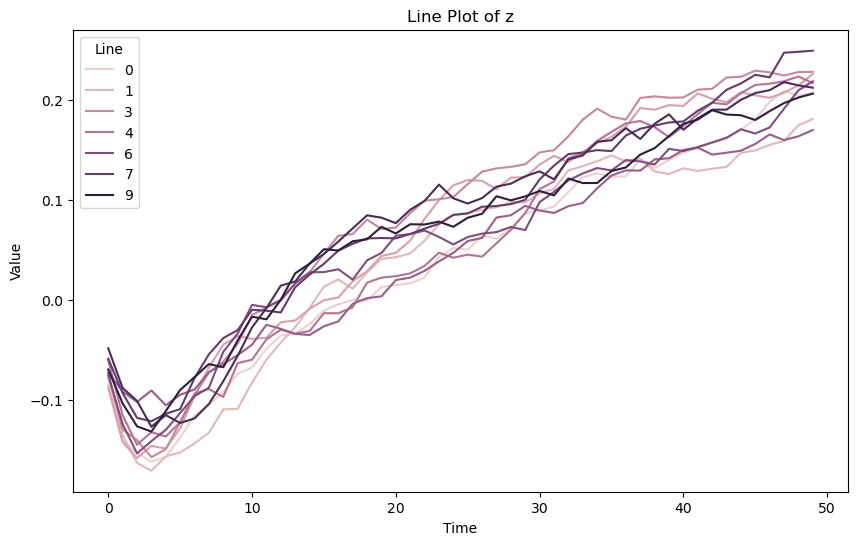

In [5]:
z_numpy = np.array(z)
z_numpy = z_numpy.squeeze(-1)

data = []
for i in range(z_numpy.shape[0]):
    for t in range(z_numpy.shape[1]):
        data.append([i, t, z_numpy[i, t]])
df = pd.DataFrame(data, columns=['Line', 'Time', 'Value'])

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Value', hue='Line', data=df)
plt.title('Line Plot of z')
plt.show()

In [6]:
key, subkey = random.split(key)
z, rates = ctrnn.apply(variables, x, init_key=subkey,)
print(f"Output shape: {z.shape}")
print(f"Rates shape: {rates.shape}")

Output shape: (10, 50, 1)
Rates shape: (10, 50, 100)


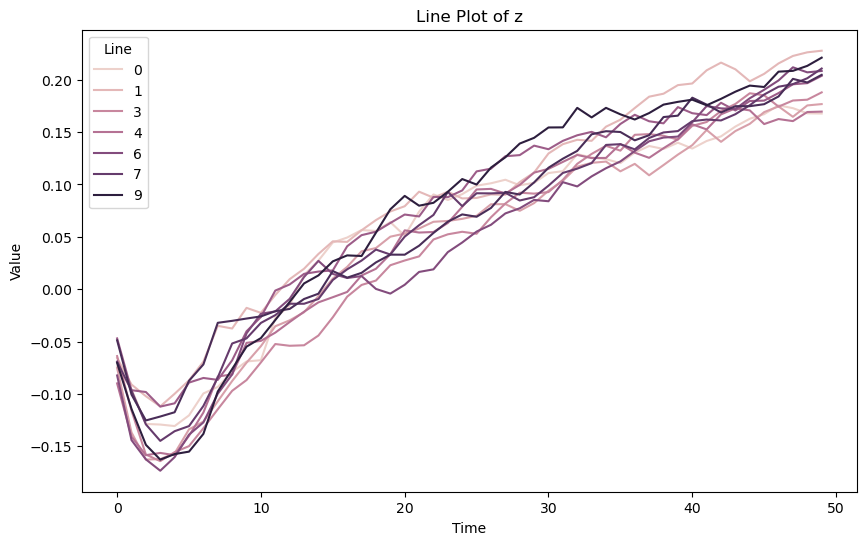

In [7]:
z_numpy = np.array(z)
z_numpy = z_numpy.squeeze(-1)

data = []
for i in range(z_numpy.shape[0]):
    for t in range(z_numpy.shape[1]):
        data.append([i, t, z_numpy[i, t]])
df = pd.DataFrame(data, columns=['Line', 'Time', 'Value'])

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Value', hue='Line', data=df)
plt.title('Line Plot of z')
plt.show()

Notice how both of the above plots are different. This is because the noise for both have different seeds given by `init_key`. The initialization for the hidden state is the `nn.initializers.zeros_init()` function, so it doesn't matter for the hidden state that the keys are different. Yet, the same key that is used to create the hidden state is the key that spawns the rest of the keys for the internal noise, so it is crucial that `init_key` is unique for every run.